In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Importing all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
sns.set()
plt.rcParams['image.cmap'] = 'viridis'


from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

import warnings
warnings.filterwarnings('ignore')

# Data Understanding

In [3]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML/online_shoppers_intention.csv')
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
data.shape

(12330, 18)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [6]:
data.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [7]:
data.nunique()

Administrative               27
Administrative_Duration    3335
Informational                17
Informational_Duration     1258
ProductRelated              311
ProductRelated_Duration    9551
BounceRates                1872
ExitRates                  4777
PageValues                 2704
SpecialDay                    6
Month                        10
OperatingSystems              8
Browser                      13
Region                        9
TrafficType                  20
VisitorType                   3
Weekend                       2
Revenue                       2
dtype: int64

In [8]:
data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [9]:
num_cols = [x for x in data.select_dtypes(include=np.number)]
cat_cols = [x for x in data.select_dtypes(exclude=np.number)]

In [10]:
print("There are", len(num_cols), "numerical columns and", len(cat_cols), "categorical columns in the dataset\n")
print("Numerical columns:", num_cols)
print("Categorical columns:", cat_cols)

There are 14 numerical columns and 4 categorical columns in the dataset

Numerical columns: ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'OperatingSystems', 'Browser', 'Region', 'TrafficType']
Categorical columns: ['Month', 'VisitorType', 'Weekend', 'Revenue']


# Exploratory Data Analysis

## Categorical Features

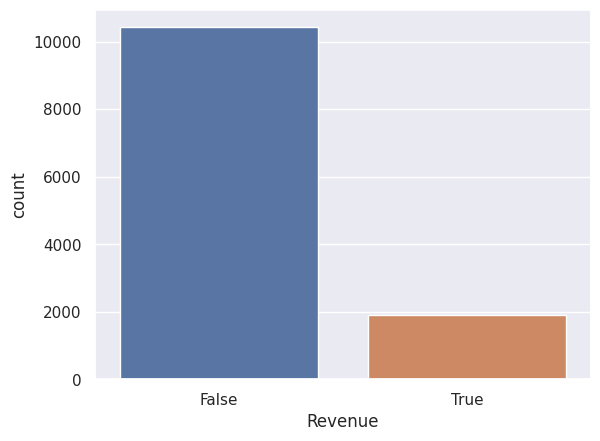

In [11]:
# Countplot for Revenue feature
sns.countplot(x='Revenue', data=data)
plt.show()

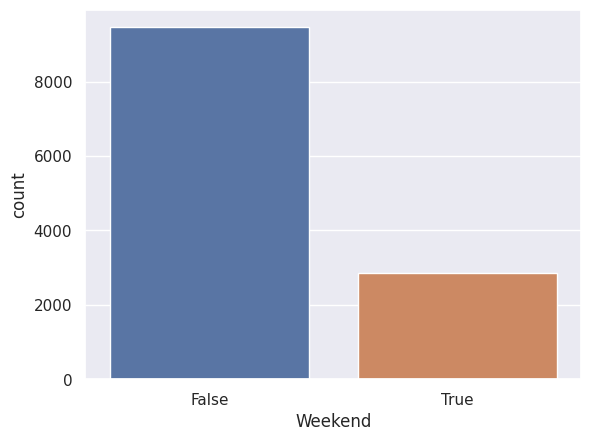

In [12]:
# Countplot for Weekend feature
sns.countplot(x='Weekend', data=data)
plt.show()

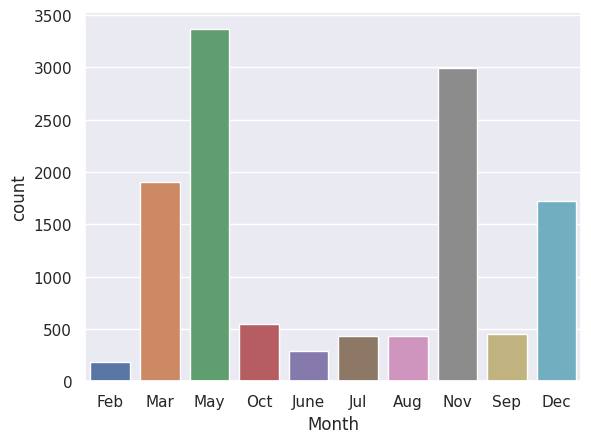

In [13]:
# Countplot for Month feature
sns.countplot(x='Month', data=data)
plt.show()

## Numerical Features

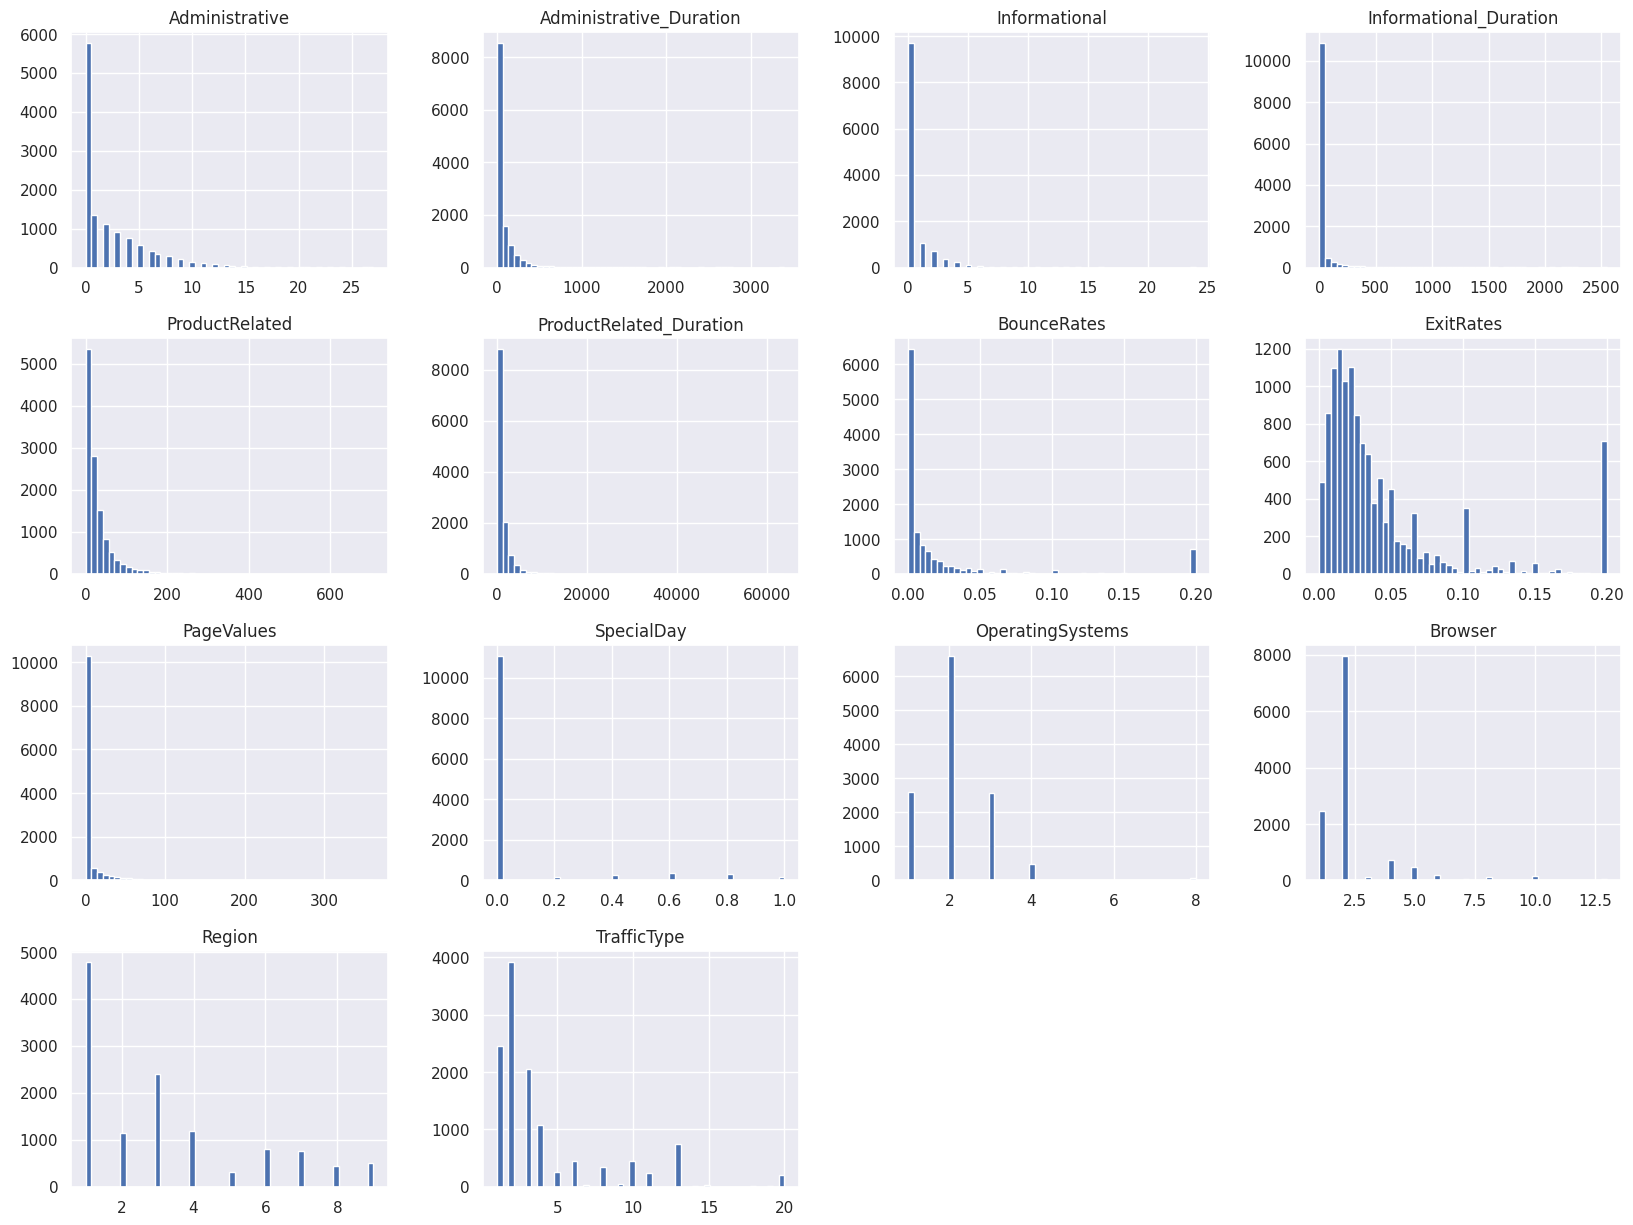

In [14]:
# Histogram for all numeric features
data.hist(bins=50, figsize=(20,15))
plt.show()

<Axes: >

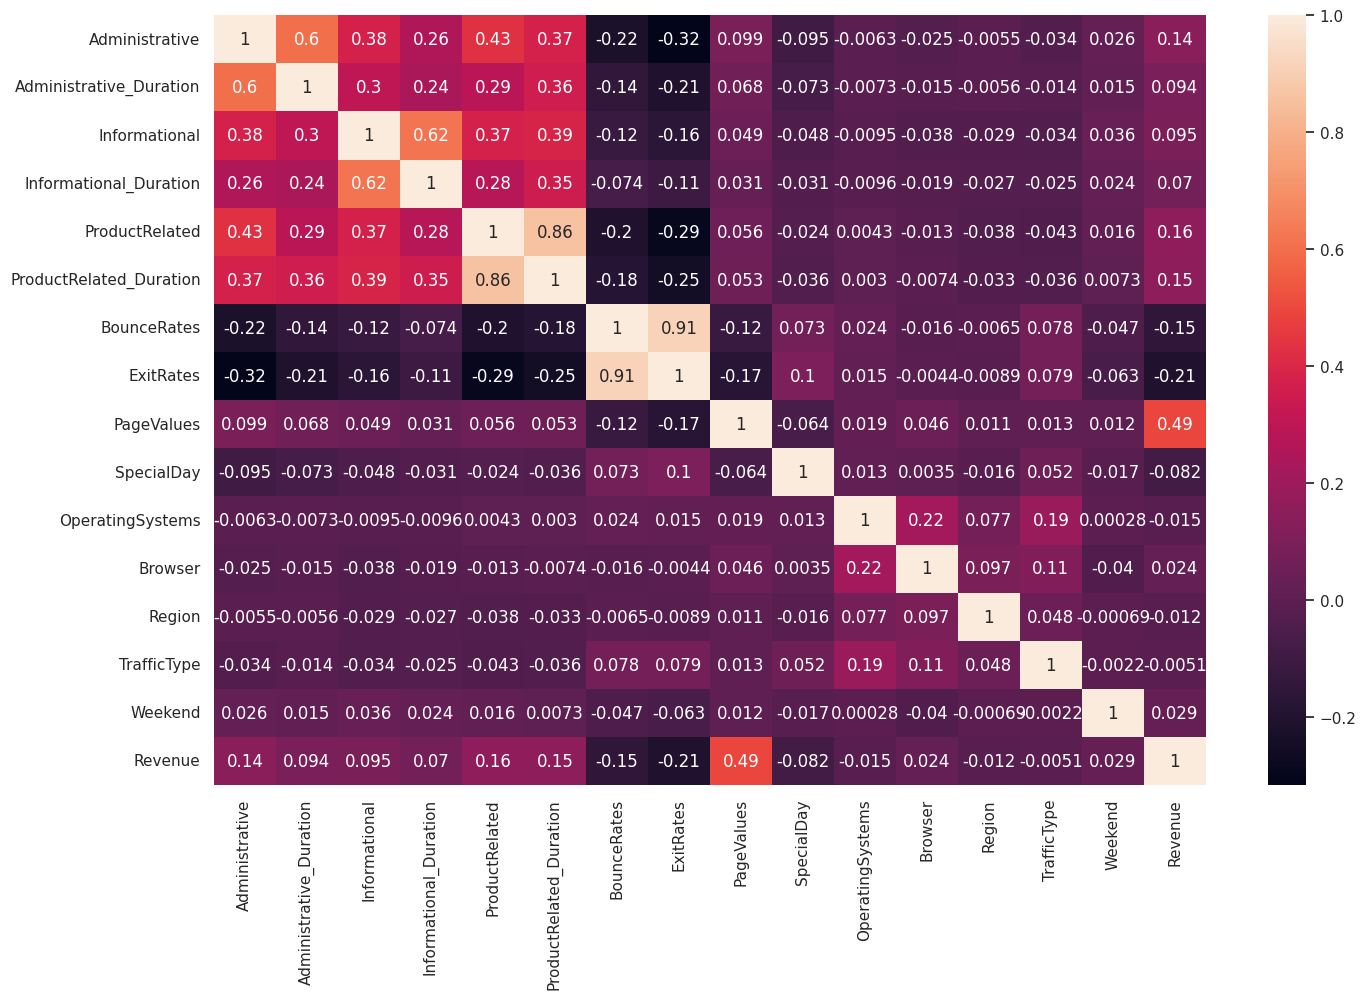

In [15]:
# Heatmap showing correlation in between numeric features
plt.figure(figsize=(16, 10))
corr = data.corr()
sns.heatmap(corr,annot=True)

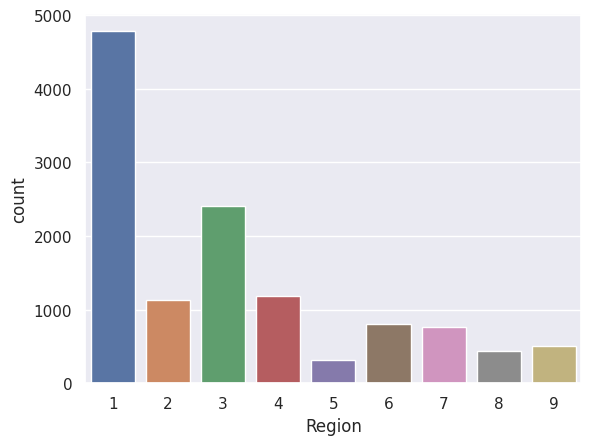

In [ ]:
# Countplot for Region feature
sns.countplot(x='Region', data=data)
plt.show()

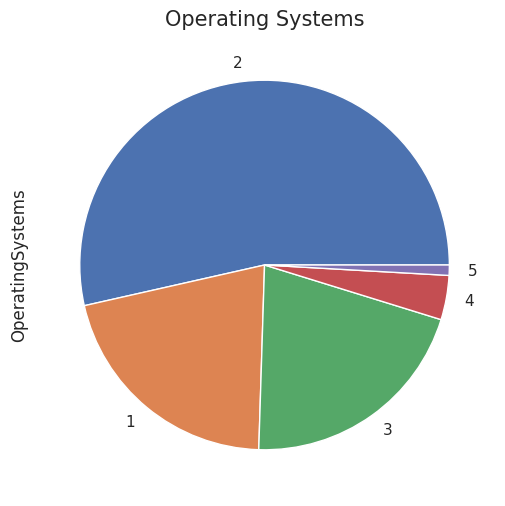

In [ ]:
data['OperatingSystems'] = data['OperatingSystems'].replace([5,6,7,8],5)
os_plot = data['OperatingSystems'].value_counts().plot.pie(figsize=(6,6))
plt.title('Operating Systems', fontsize=15)
plt.show()

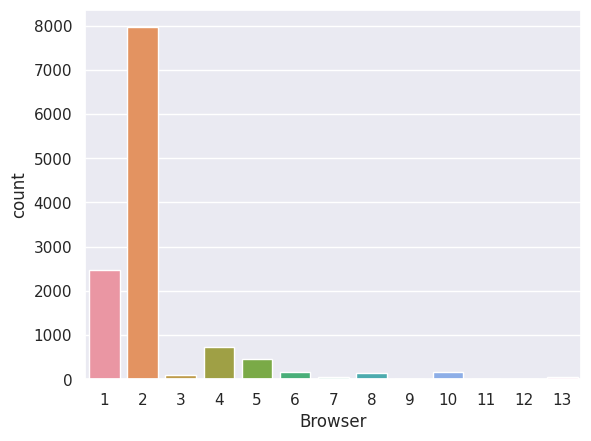

In [ ]:
# Countplot for Browser feature
sns.countplot(x='Browser', data=data)
plt.show()

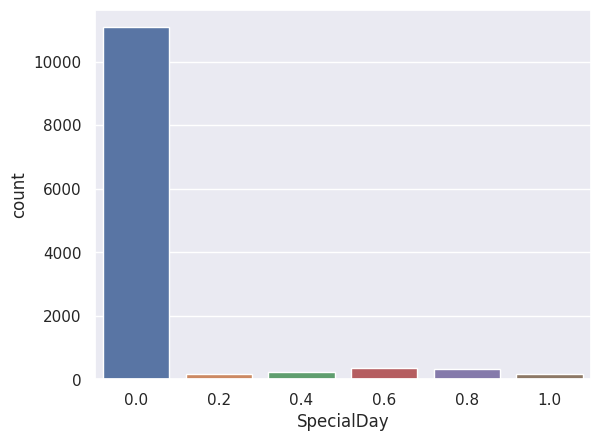

In [ ]:
# Countplot for SpecialDay feature
sns.countplot(x='SpecialDay', data=data)
plt.show()

# Data Cleaning

In [ ]:
encoder = LabelEncoder()
data['Month'] = encoder.fit_transform(data['Month'])
data['VisitorType'] = encoder.fit_transform(data['VisitorType'])
data['Weekend'] = encoder.fit_transform(data['Weekend'])
data['Revenue'] = encoder.fit_transform(data['Revenue'])

In [ ]:
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,2,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,2,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,2,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,2,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,2,1,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  int64  
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

# Model Building

In [ ]:
X = data.drop(columns=['Revenue','Weekend','Informational_Duration'], axis=1)
y1 = data['Revenue']
y2 = data['Weekend']
y3 = data['Informational_Duration']

In [ ]:
X_train, X_test, y1_train, y1_test = train_test_split(X, y1,random_state=2, test_size=.2)
X_train, X_test, y2_train, y2_test = train_test_split(X, y2,random_state=2, test_size=.2)
X_train, X_test, y3_train, y3_test = train_test_split(X, y3,random_state=2, test_size=.2)

### Revenue Classification

In [ ]:
# Random Forest Classifier
rf1_clf = RandomForestClassifier()
rf1_clf.fit(X_train, y1_train)
rf1_predictions = rf1_clf.predict(X_test)

In [ ]:
rf1_predictions

array([0, 0, 0, ..., 0, 1, 0])

In [ ]:
print(classification_report(y1_test, rf1_predictions))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95      2116
           1       0.70      0.57      0.63       350

    accuracy                           0.90      2466
   macro avg       0.82      0.77      0.79      2466
weighted avg       0.90      0.90      0.90      2466



In [ ]:
cm=confusion_matrix(y1_test,rf1_predictions)
cm

array([[2031,   85],
       [ 150,  200]])

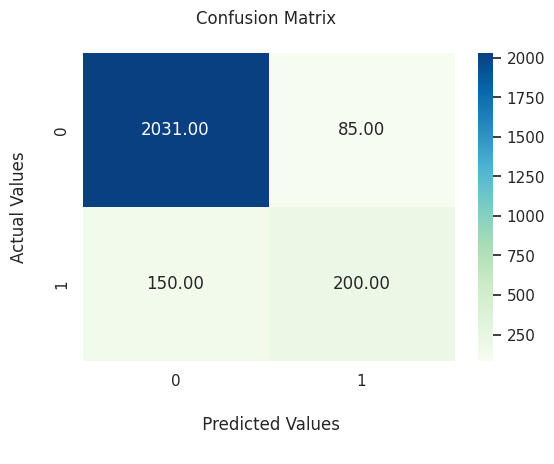

In [ ]:
# Plotting confusion matrix
plt.figure(figsize=(6,4))
fx=sns.heatmap(confusion_matrix(y1_test,rf1_predictions), annot=True, fmt=".2f",cmap="GnBu")
fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Values\n')
fx.set_ylabel('Actual Values\n');
plt.show()

In [ ]:
rf1=accuracy_score(y1_test, rf1_predictions)
rf1

0.9047039740470397

### Weekend Classification

In [ ]:
# Random Forest Classifier
rf2_clf = RandomForestClassifier()
rf2_clf.fit(X_train, y2_train)
rf2_predictions = rf2_clf.predict(X_test)

In [ ]:
rf2_predictions

array([0, 1, 0, ..., 0, 0, 0])

In [ ]:
print(classification_report(y2_test, rf2_predictions))

              precision    recall  f1-score   support

           0       0.78      0.98      0.87      1893
           1       0.63      0.10      0.17       573

    accuracy                           0.78      2466
   macro avg       0.71      0.54      0.52      2466
weighted avg       0.75      0.78      0.71      2466



In [ ]:
cm=confusion_matrix(y2_test,rf2_predictions)
cm

array([[1860,   33],
       [ 516,   57]])

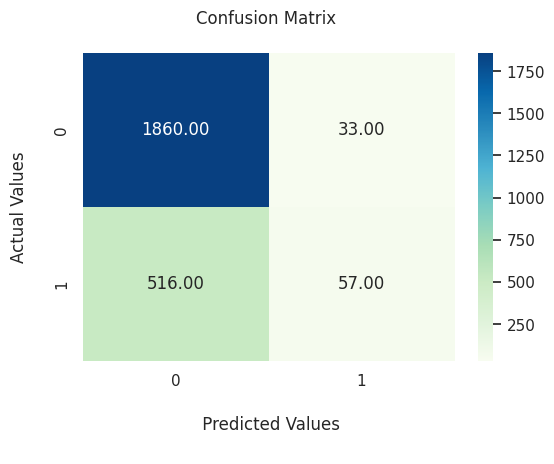

In [ ]:
# Plotting confusion matrix
plt.figure(figsize=(6,4))
fx=sns.heatmap(confusion_matrix(y2_test,rf2_predictions), annot=True, fmt=".2f",cmap="GnBu")
fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Values\n')
fx.set_ylabel('Actual Values\n');
plt.show()

In [ ]:
rf2=accuracy_score(y2_test, rf2_predictions)
rf2

0.7773722627737226

### Informational Duration

In [ ]:
# Random Forest Regressor
rf3_clf = RandomForestRegressor()
rf3_clf.fit(X_train, y3_train)
rf3_predictions = rf3_clf.predict(X_test)

In [ ]:
rf3_predictions

array([  0.        ,   0.        ,   0.        , ...,  77.98      ,
         0.        , 332.18896666])

In [ ]:
informational_mse = mean_squared_error(y3_test, rf3_predictions)
print("Informational Duration MSE:", informational_mse)

Informational Duration MSE: 14050.602699464369
